In [1]:
from keras.models import model_from_json
import numpy as np
import scipy.misc
from tensorflow.keras.models import model_from_json
from tensorflow.keras.optimizers import SGD
from PIL import Image

2024-05-14 13:44:16.562495: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-14 13:44:16.938166: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-14 13:44:17.023755: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-05-14 13:44:17.023777: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
with open("./model/model.json", "r") as f:
    model = model_from_json(f.read())

2024-05-14 13:44:21.493528: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-05-14 13:44:21.493990: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-05-14 13:44:21.494023: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Playdata): /proc/driver/nvidia/version does not exist
2024-05-14 13:44:21.494858: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
model.load_weights('./model/model.h5')

In [4]:
label = {0 : "airplane",
            1 : "automobile",
            2 : "bird",
            3 : "cat",
            4 : "deer",
            5 : "dog",
            6 : "frog",
            7 : "horse",
            8 : "ship",
            9 : "truck",}

In [5]:
optim = SGD()
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 24, 24, 128)       0     

In [7]:
image = Image.open("./image/c.jpg").resize(size=(96, 96)) 
my_image = np.array(image, dtype=float) / 255
my_image = my_image.reshape(-1,96,96,3)

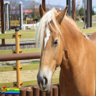

In [8]:
image

In [9]:
np.argmax(model.predict(my_image))

1/1 [==============================] - 0s 312ms/step


7

In [10]:
label[np.argmax(model.predict(my_image))]

1/1 [==============================] - 0s 91ms/step


'horse'